In [1]:
import h5py 
import numpy as np
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
def read_file(file_path:str)->np.ndarray:
    """
    Read h5py file from file_path 
    ### Arguments:
        file_path(str): file path
    ### Returns:
        data file (np.array) of file_path
    """
    with h5py.File(file_path) as f:
        # Access the dataset 
        print(f.keys())
        image = f[list(f.keys())[0]]
        image = np.asarray(image) # (128,128,14)
    return image

In [3]:
# DATA_PATH ='../dataset/train'
IMAGES_PATH='../dataset/train/img'
MASKS_PATH='../dataset/train/mask'
data_dict = dict()
for idx,file_name in enumerate(os.listdir(IMAGES_PATH)):
    img_path = os.path.join(IMAGES_PATH,file_name)
    mask_path=os.path.join(MASKS_PATH,file_name.replace('image','mask'))
    image = read_file(img_path)
    mask = read_file(mask_path)
    data_dict[idx]=(image,mask)


<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5 ['img']>
<KeysViewHDF5 ['mask']>
<KeysViewHDF5

statistic info:mins:[0.92551588 0.86826639 0.78382149 0.68512706 0.69055396 0.46131926
 0.51773986 0.2972201  0.84411881 0.88418563 0.51437033 0.43854252
 0.         0.        ]
means:[0.95331522 0.95463817 1.03676181 0.9817524  1.14160832 1.31685438
 1.31392276 1.32210622 1.45390253 1.10691848 1.19418812 1.15427785
 0.67237295 0.02105713]
maxs"[1.09550859 1.965726   2.72377967 5.06544763 3.71598542 1.97579033
 2.04035411 2.15574715 1.91076454 1.32627844 2.94528629 4.29887073
 2.02047255 1.        ]
stds:[0.02070455 0.05615097 0.11498307 0.32688868 0.22056942 0.19717254
 0.21917815 0.24798986 0.19933476 0.09311067 0.24443346 0.36912645
 0.3259618  0.14357481]


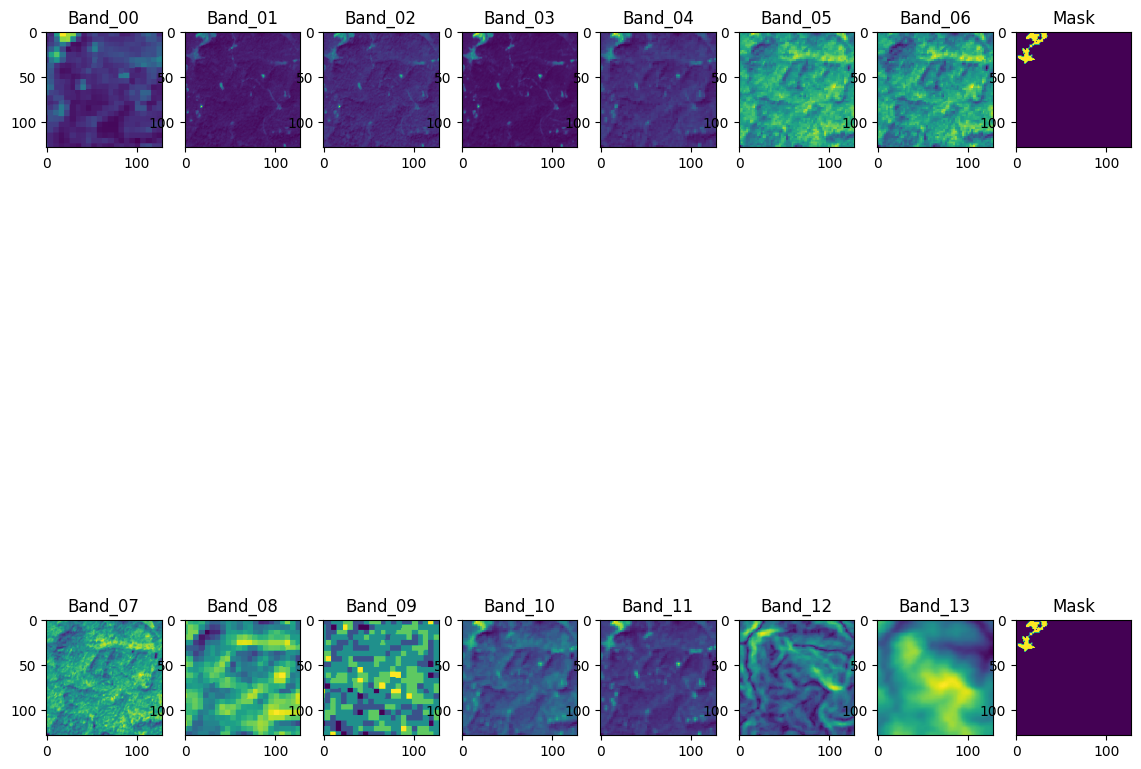

In [4]:
# Visualize band of data_dict 
def visualize(data_dict:dict,idx=0):
    """
    Visualize 14 bands of data and mask of data given index 
    ### Arguments:
        data_dict(dictionary): data source 
        idx(int): index of 14 bands and mask data
    """
    img,mask = data_dict[idx]
    figure,axes= plt.subplots(nrows=2,ncols=8, figsize=(14, 14)) 
    # plt.figure(figsize=(16,16))
    for row in range(2):
        for col in range(7):
            idx = row*7+col 
            title = f'Band_{idx:02d}'
            axes[row,col].imshow(img[...,idx])
            axes[row,col].set_title(title)
    axes[1,7].imshow(mask)
    axes[1,7].set_title('Mask')
    axes[0,7].imshow(mask)
    axes[0,7].set_title('Mask')
    
    means = np.mean(img,axis=(0,1))[...,np.newaxis]
    means[-1]=np.mean(mask)
    stds = np.std(img,axis=(0,1))[...,np.newaxis]
    stds[-1]=np.std(mask)
    mins = np.min(img,axis=(0,1))[...,np.newaxis]
    mins[-1]=np.min(mask)
    maxs = np.expand_dims(np.max(img,axis=(0,1)),axis=-1)
    maxs[-1]=np.max(mask)
    print(f'statistic info:mins:{mins.flatten()}\nmeans:{means.flatten()}\nmaxs"{maxs.flatten()}\nstds:{stds.flatten()}')
    plt.show() 
visualize(data_dict=data_dict)


### Nhận xét
    1. Các kênh có min và max khá khác nhau, không có dạng từ 0 đến 255 như hình ảnh thường
    2. Mask có dạng chuẩn hóa từ 0 đến 1 
    

In [5]:
import cv2 

def addRGB(multispectral_img, is_rgb=False):
  """
    add RGB channels to image using Min-Max scaling
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  if is_rgb:
    bgr = multispectral_img[:,:,0:3] # BGR
  else:
    bgr = multispectral_img[:,:,1:4] # BGR

  red   = (bgr[:,:,2]-np.min(bgr[:,:,2])) / (np.max(bgr[:,:,2])-np.min(bgr[:,:,2]))
  green = (bgr[:,:,1]-np.min(bgr[:,:,1])) / (np.max(bgr[:,:,1])-np.min(bgr[:,:,1]))
  blue  = (bgr[:,:,0]-np.min(bgr[:,:,0])) / (np.max(bgr[:,:,0])-np.min(bgr[:,:,0]))

  red   = np.expand_dims(red, axis=2)
  green = np.expand_dims(green, axis=2)
  blue  = np.expand_dims(blue, axis=2)

  multispectral_img = np.concatenate((multispectral_img, red), axis=-1)
  multispectral_img = np.concatenate((multispectral_img, green), axis=-1)
  multispectral_img = np.concatenate((multispectral_img, blue), axis=-1)

  return multispectral_img


def addNDVI(multispectral_img):
  """
    NDVI = (NIR-RED) / (NIR+RED) = (B8-B4)/(B8+B4)
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  red   = multispectral_img[:,:,3] # B4
  nir   = multispectral_img[:,:,7] # B8
  nvdi  = (nir-red) / np.clip(nir+red, a_min=1e-8, a_max=None)
  nvdi  = np.expand_dims(nvdi, axis=2)

  multispectral_img = np.concatenate((multispectral_img, nvdi), axis=-1)

  return multispectral_img

def addVegetationIndex(multispectral_img):
  """
    VI = (B8-B11)/(B8+B11)
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  b8   = multispectral_img[:,:,7]  # B8
  b11  = multispectral_img[:,:,10] # B11
  vi   = (b8-b11) / np.clip(b8+b11, a_min=1e-8, a_max=None)
  vi   = np.expand_dims(vi, axis=2)

  multispectral_img = np.concatenate((multispectral_img, vi), axis=-1)

  return multispectral_img


def addNBR(multispectral_img):
  """
    NBR = (NIR-SWIR) / (NIR+SWIR) = (B8-B12)/(B8+B12)
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
        multispectral_img = multispectral_img.numpy()

  swir  = multispectral_img[:,:,11] # B12
  nir   = multispectral_img[:,:,7] # B8
  nbr   = (nir-swir) / np.clip(nir+swir, a_min=1e-8, a_max=None)
  nbr   = np.expand_dims(nbr, axis=2)

  multispectral_img = np.concatenate((multispectral_img, nbr), axis=-1)

  return multispectral_img


def addGray(multispectral_img):
  """
    gray = (B2+B3+B4)/3
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  b    = multispectral_img[:,:,1] # B2
  g    = multispectral_img[:,:,2] # B3
  r    = multispectral_img[:,:,3] # B4
  gray = (b + g + r) / 3
  gray = np.expand_dims(gray, axis=2)

  multispectral_img = np.concatenate((multispectral_img, gray), axis=-1)

  return multispectral_img


def addEdge(multispectral_img):
  """
    Canny Edge Detection
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  gray  = multispectral_img[:,:,17] #
  gray  = (gray-np.min(gray)) / (np.max(gray)-np.min(gray))
  gray *= 255
  gray  = gray.astype(np.uint8)

  edge  = cv2.Canny(gray,150,227)
  edge  = edge.astype(np.float32)
  edge /= 255.
  edge = np.expand_dims(edge, axis=2)

  multispectral_img = np.concatenate((multispectral_img, edge), axis=-1)

  return multispectral_img


def addBlur(multispectral_img):
  """
    Gaussian and Median Blurring
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  gray  = multispectral_img[:,:,17] #
  gray  = (gray-np.min(gray)) / (np.max(gray)-np.min(gray))
  gray *= 255.
  gray  = gray.astype(np.uint8)

  blur  = cv2.blur(gray,(10,10))
  blur  = blur.astype(np.float32)
  blur /= 255.
  blur  = np.expand_dims(blur, axis=2)
  multispectral_img = np.concatenate((multispectral_img, blur), axis=-1)

  blur  = cv2.medianBlur(gray,15)
  blur  = blur.astype(np.float32)
  blur /= 255.
  blur  = np.expand_dims(blur, axis=2)
  multispectral_img = np.concatenate((multispectral_img, blur), axis=-1)

  return multispectral_img


def addGradient(multispectral_img):
  """
    Gradient along x-axis and y-axis
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  norm_factor = 27.32001
  gray  = multispectral_img[:,:,17] #
  gray  = (gray-np.min(gray)) / (np.max(gray)-np.min(gray))

  sobel_x  = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
  sobel_x  = sobel_x.astype(np.float32)
  sobel_x /= norm_factor
  sobel_x  = np.expand_dims(sobel_x, axis=2)
  multispectral_img = np.concatenate((multispectral_img, sobel_x), axis=-1)

  sobel_y  = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)
  sobel_y  = sobel_y.astype(np.float32)
  sobel_y /= norm_factor
  sobel_y  = np.expand_dims(sobel_y, axis=2)
  multispectral_img = np.concatenate((multispectral_img, sobel_y), axis=-1)

  return multispectral_img


In [6]:
def create_channels(img):
    """
    Create new channels from an image with 14 bands 
    ### Arguments:
        img(np.ndarray): image to be caclculated 
    ### Returns:
        image with new channels addeds
    """
    img = addNDVI(img)
    img = addVegetationIndex(img)
    img = addNBR(img)
    img = addGray(img)
    img = addEdge(img)
    img = addBlur(img)
    img = addGradient(img)
    return img 


img,mask = data_dict[0]
img = create_channels(img)
img.shape

(128, 128, 23)

In [7]:
def corr(img:np.ndarray,mask:np.ndarray)->np.ndarray:
    """
    Calculate cross correlation between image and mask 
    ### Arguments:
        img(np.ndarray): image with multiple channels 
        mask(np.ndarray): mask of image 
    ### Returns:
        correlation of each channel and image 
    """
    w,h,c= img.shape
    data = np.reshape(img,(-1,c)).T
    mask = np.reshape(mask,(-1,1)).T
    # print('data.shape',data.shape,'mask.shape',mask.shape)
    
    # 1. concat all data 
    data = np.concatenate((data,mask),axis=0)


    # 2. Normalize data 
    data_len = np.sqrt(np.sum(data**2,axis =1))[...,np.newaxis]
    data /=data_len 

    # 3. return cosine similarity of 2 vector 
    return np.matmul(data,data.T)





### Độ tương quan của các features được tạo ra:
    1. Cao nhất là NDVI được tạo ra từ band_07 và band_03, cao do band_07 và band_03 có độ tương quan rất cao so với mask 
    2. gradient_y: cao do không biết ??? maybe các landslide phân bố theo chiều dọc 
    3. các feature được tạo ra không có độ tương quan đáng kể 
### Ideas:
    - Tạo feature bậc 1:
        4. Tạo featuer là tổng của band_07 và band_09 ( vì band_07 và band_09 có độ tương quan âm)
        5. Tạo feature là tổng của band_07 và band_03 ( vì band_07 và band_03 có độ tương quan âm)
        6. Tạo feature là tổng của band_03 và band_09 ( vì band_03 và band_09 có độ tương quan dương)


### Idea:
    - Tạo features bậc 2, từ các features được bậc 1 được sinh ra
    1. Tổng của NDVI với sum_07_09
    2. Tổng của NDVI với sum_07_03
    3. Tổng của NDVI với sum_03_09 
    4. Tổng của Gradient_Y với sum_07_09
    5. Tổng của Gradient_Y với sum_07_03 
    6. Tổng của Gradient_Y với sum_03_09 

In [8]:
def addMoreData(multispectral_img):
  """
    add sum_0709
    add sum_0307
    add sum_0309
    add sum_NDVI_0709
    add sum_NDVI_0307
    add sum_NDVI_0309
    add sum_GradY_0709
    add sum_GradY_0307
    add sum_GradY_0309
  """
  if not isinstance(multispectral_img, np.ndarray): # convert tf.tensor to np.array
    multispectral_img = multispectral_img.numpy()

  # 1.sum_0709
  sum_0709 = multispectral_img[...,7]+multispectral_img[...,9]
  # 2.sum_0307
  sum_0307 = multispectral_img[...,3]+multispectral_img[...,7]

  # 3.sum_0309
  sum_0309 = multispectral_img[...,3]+multispectral_img[...,9]

  # 4.sum_NDVI_0709 
  sum_NDVI_0709 = sum_0709+multispectral_img[...,14]
  sum_NDVI_0709 = sum_NDVI_0709[...,np.newaxis]

  # 5.sum_NVDI_0307 
  sum_NDVI_0307 = sum_0307+multispectral_img[...,14]
  sum_NDVI_0307 = sum_NDVI_0307[...,np.newaxis]

  # 6.sum_NVDI_0309 
  sum_NDVI_0309 = sum_0309+multispectral_img[...,14]
  sum_NDVI_0309 = sum_NDVI_0309[...,np.newaxis]

  # 7.sum_GradY_0709 
  sum_GradY_0709 = sum_0709+multispectral_img[...,22]
  sum_GradY_0709 = sum_GradY_0709[...,np.newaxis]

  # 8.sum_GradY_0307
  sum_GradY_0307 = sum_0307+multispectral_img[...,22]
  sum_GradY_0307 = sum_GradY_0307[...,np.newaxis]

  # 9.sum_GradY_0309
  sum_GradY_0309 = sum_0309+multispectral_img[...,22]
  sum_GradY_0309 = sum_GradY_0309[...,np.newaxis]

  sum_0709 = sum_0709[...,np.newaxis]
  sum_0307 = sum_0307[...,np.newaxis]
  sum_0309 = sum_0309[...,np.newaxis]

  multispectral_img = np.concatenate((multispectral_img,sum_0709,sum_0307,sum_0309,sum_NDVI_0709,sum_NDVI_0307,sum_NDVI_0309,sum_GradY_0709,sum_GradY_0307,sum_GradY_0309),axis=-1)
  return multispectral_img

In [9]:
n_img = len(data_dict)
corr_dict=dict() 
for idx in range(n_img):
    img,mask = data_dict[idx]
    img = create_channels(img)
    # img = addMoreData(img)
    if np.sum(mask)>0:
        corrs = corr(img,mask)
        corr_dict[idx]=(img,mask,corrs)
print(f'num of landslide[/total img:{len(corr_dict)}/{len(data_dict)}')

num of landslide[/total img:2231/3799


In [10]:
total_corrs=None 
for k,v in corr_dict.items():
    img,mask,corrs = v 
    total_corrs = total_corrs+corrs if total_corrs is not None else corrs 

total_corrs/=len(corr_dict) 

# img = addNDVI(img)
# img = addVegetationIndex(img)
# img = addNBR(img)
# img = addGray(img)
# img = addEdge(img)
# img = addBlur(img)
# img = addGradient(img)
# add sum_0709
#     add sum_0307
#     add sum_0309
#     add sum_NDVI_0709
#     add sum_NDVI_0307
#     add sum_NDVI_0309
#     add sum_GradY_0709
#     add sum_GradY_0307
#     add sum_GradY_0309
columns=[f'band_{(i+1):02d}' for i in range(14)] + ['NDVI','VI','NBR','Gray','Sobel','Blur_Mean','Blur_Median','Gradient_X','Gradient_Y','Mask']
import pandas as pd 

df = pd.DataFrame(total_corrs,columns=columns)

df.head()

,band_01,band_02,band_03,band_04,band_05,band_06,band_07,band_08,band_09,band_10,...,NDVI,VI,NBR,Gray,Sobel,Blur_Mean,Blur_Median,Gradient_X,Gradient_Y,Mask
0,1.000000,0.993553,0.977625,0.928526,0.949306,0.936668,0.930961,0.919992,0.941989,0.982527,...,0.122861,0.056119,0.178528,0.971919,0.245776,0.887962,0.896704,-0.000295,-0.000963,0.198188
1,0.993553,1.000000,0.993024,0.961353,0.967387,0.938309,0.930213,0.920469,0.937331,0.975179,...,0.096653,0.021972,0.133522,0.991064,0.270226,0.913185,0.917961,-0.001353,-0.002311,0.240499
2,0.977625,0.993024,1.000000,0.980653,0.986535,0.951778,0.942375,0.935856,0.942379,0.963723,...,0.120163,-0.002112,0.098943,0.998150,0.288675,0.937881,0.940027,0.002381,0.006842,0.265835
3,0.928526,0.961353,0.980653,1.000000,0.973763,0.901888,0.887668,0.880432,0.886154,0.911114,...,0.027986,-0.102557,-0.021134,0.988857,0.334175,0.958297,0.949343,-0.000184,-0.001529,0.346766
4,0.949306,0.967387,0.986535,0.973763,1.000000,0.969558,0.960159,0.952353,0.952913,0.945688,...,0.179913,-0.048729,0.053704,0.982972,0.298201,0.949949,0.951397,0.010380,0.023064,0.266916


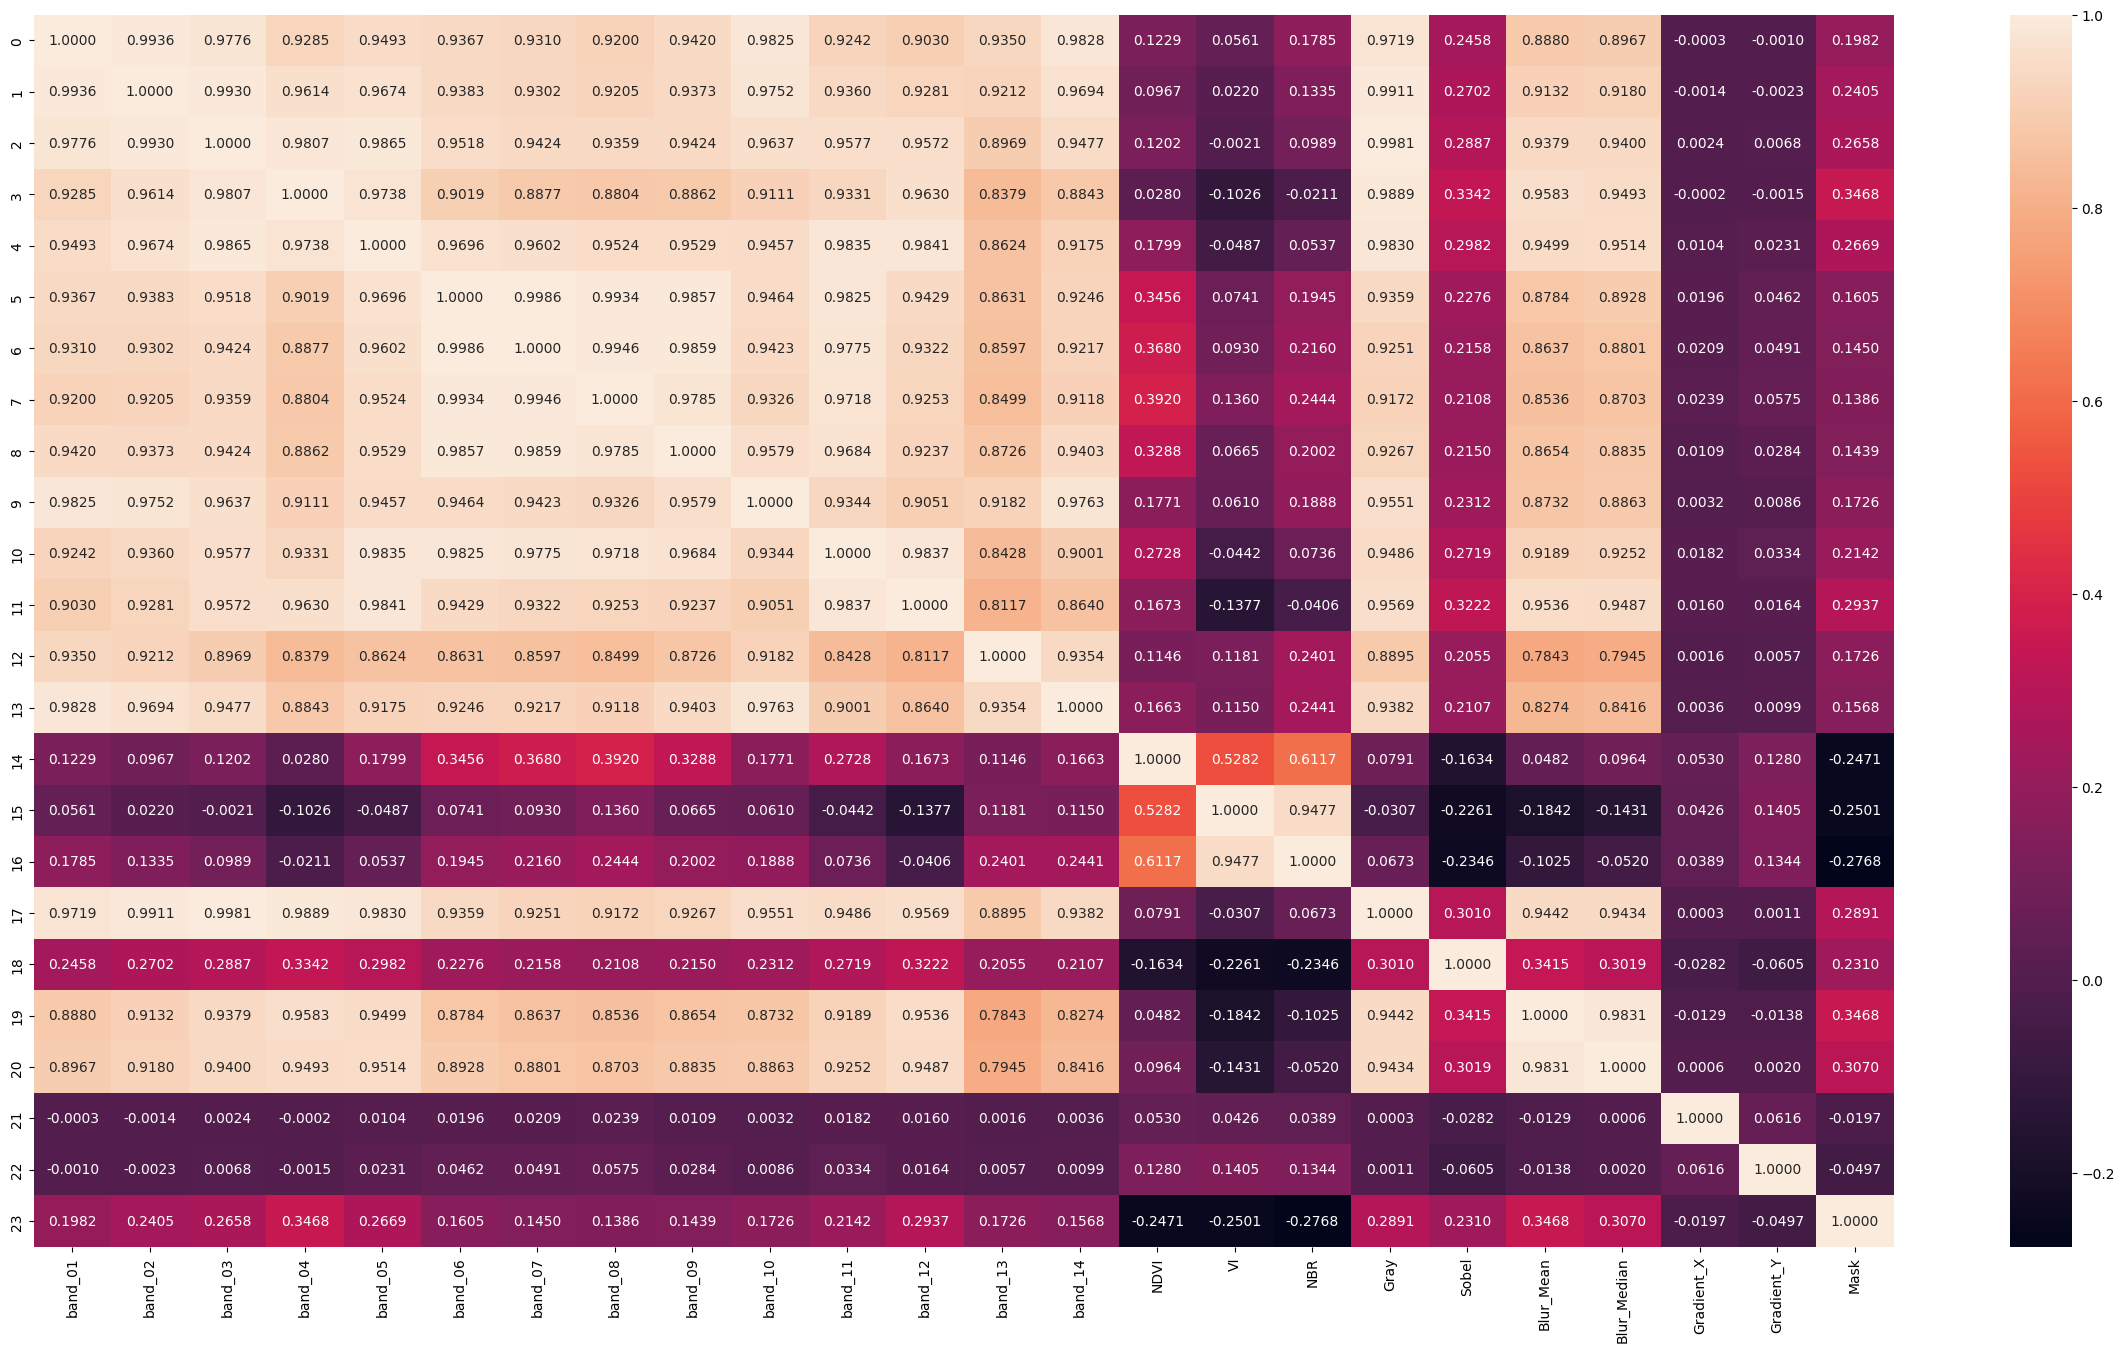

In [11]:
plt.figure(figsize=(30,16))
sns.heatmap(data=df,annot=True,fmt='.4f')
plt.show()

### Độ tương quan của các features được tạo ra:
    1. Độ tương quan với mask cao nhất ở các original band_06 và band_08, cao do band_11 (0.0009) và band_07, band_09, band_10, band_12
    2. Các feature được tạo ra có độ tương quan cao với mask bao gồm Blur_Mean, Blur_Median, Gradient_X (0.0009), tiếp đến là gray(0.0007) và Sobel(0.0006), các feature còn lại có độ tương quan không lớn với mask
### Ideas:
    - Tạo feature bậc 1:
        1. Loại bỏ các feauture có độ tương quan thấp, chỉ giữ lại các feauture có độ tương quan >= 0.6 so với mask 
        2. Tạo các feature bậc 2 từ các feature bậc 1 bằng cách mũ 2, hoặc cộng và trừ các feature với nhau, sau đó lọc lại 1 lần nữa 

In [ ]:
df.iloc[-1][df.iloc[-1]>0.0006]

# Kết luận:
- Các band từ 6 đến 12 ảnh hưởng mạnh tới mask 
- Việc lấy blur hoặc gradient cũng ảnh hưởng mạnh tới Mask 

In [ ]:
n_img = len(data_dict)
corr_dict=dict() 
for idx in range(n_img):
    img,mask = data_dict[idx]
    img = polinomial_features(img)
    # img = addMoreData(img)
    if np.sum(mask)>0:
        corrs = corr(img,mask)
        corr_dict[idx]=(img,mask,corrs)
print(f'num of landslide[/total img:{len(corr_dict)}/{len(data_dict)}')

In [ ]:
corr_dict[0]